# Credit Card Fraud Classification
<a target="_blank" href="https://colab.research.google.com/github/amiidae/showcase/blob/main/credit_card_fraud_detection.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Problem Description

In this project we are going to work on a model to predict whether a credit card transaction was fraudulent or legit.

We'll train five different classifiers from scikit-learn library:
- Logistic Regression
- Linear Support Vector Classifier
- Random Forrest Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier

We also will be using cross-validation to compute three fitness metrics of these models:
- Accuracy
- F1 Score
- Area Under the ROC Curve (ROC AUC Score)


## Set Up

### Importing Libraries and Updating Settings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
warnings.filterwarnings("ignore")

sns.set_theme(palette = "coolwarm", style = 'ticks', rc = {'axes.spines.left': True,
                                                           'axes.spines.bottom': True,
                                                           'axes.spines.right': False,
                                                           'axes.spines.top': False})

### About the Data

Dataset in use: [Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023) from Kaggle.

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized, using PCA algorithm, to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

Features:

- **id**: Unique identifier for each transaction.
- **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.).
- **Amount**: The transaction amount.
- **Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0).

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wohtgfauFBOqdIiyBaOGvt70qnWUhNnI' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wohtgfauFBOqdIiyBaOGvt70qnWUhNnI" -O creditcard_2023.csv && rm -rf /tmp/cookies.txt

--2023-11-06 21:38:11--  https://docs.google.com/uc?export=download&confirm=t&id=1wohtgfauFBOqdIiyBaOGvt70qnWUhNnI
Resolving docs.google.com (docs.google.com)... 172.217.194.102, 172.217.194.113, 172.217.194.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ni3hb4grvla4skbvdtk5n52m96t0s0mm/1699306650000/04423460633198093259/*/1wohtgfauFBOqdIiyBaOGvt70qnWUhNnI?e=download&uuid=a1718b39-49a6-4d59-ae8e-b3961e40e9e2 [following]
--2023-11-06 21:38:11--  https://doc-0g-2k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ni3hb4grvla4skbvdtk5n52m96t0s0mm/1699306650000/04423460633198093259/*/1wohtgfauFBOqdIiyBaOGvt70qnWUhNnI?e=download&uuid=a1718b39-49a6-4d59-ae8e-b3961e40e9e2
Resolving doc-0g-2k-docs.googleusercontent.com (doc-0g-2k-docs.googleusercontent.com)... 142.251.175.

In [ ]:
df = pd.read_csv("creditcard_2023.csv", index_col = "id")

df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25003,-0.426507,-1.277298,1.982385,-0.192085,1.491964,-0.733314,0.112190,-0.136691,1.035419,0.461584,-1.528072,0.962017,0.001318,0.428786,-1.216360,0.244317,0.346833,0.230872,-0.668680,0.388232,0.004680,0.388446,0.346483,0.842535,-0.612930,-1.451924,-0.277768,-0.038450,18796.85,0
313552,-1.334158,1.484948,-1.565621,1.472533,-1.668102,-1.925892,-1.839461,0.680540,-1.435967,-1.985824,1.740242,-1.858151,0.063182,-1.445825,0.046520,-2.026115,-2.027572,-1.994713,2.201354,0.392964,0.397280,0.771793,0.249037,1.084827,-0.408472,-0.507619,-1.018814,0.158594,11288.41,1
534289,0.465416,0.315232,-0.610440,0.826554,0.311356,-0.199748,-0.058418,-0.222837,-0.612835,-0.259598,0.526064,-0.518316,-0.808547,-0.716595,0.285475,-0.514580,0.022305,0.268660,1.286704,0.423947,-0.089361,0.335869,-0.014717,0.318062,-0.177919,0.241015,0.280691,0.301168,22061.07,1
386707,0.248584,-0.195640,0.291809,-0.559542,0.642832,0.202245,0.596877,-0.137349,0.374522,0.527288,-0.016316,0.804471,-0.569356,0.402669,-0.172361,0.503621,0.688633,0.572433,0.600817,-0.103351,-0.213853,-0.636265,0.099148,1.205070,-0.986714,0.553071,-0.129678,-0.074007,2690.32,1
263206,2.018734,-0.982118,0.101948,-1.600698,-0.120831,0.194395,0.107317,-0.173044,-0.210645,1.585198,-0.428985,0.368559,-0.020494,0.642469,-0.856198,0.270677,0.514707,0.637105,-0.014292,-0.633794,-0.159724,0.019916,0.156494,-0.840214,-0.369502,-0.337918,-0.233540,-0.260415,14173.32,0


## EDA

Checking data types of the features and presence of missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

There are no missing values and all features are numerical - all of type float, except target feature Class, which is int.

Lets look at common statistics.

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


If we look closely on `Class` column we can see, that the value of mean is 0.5.

In [ ]:
df[["Class"]].describe()

,Class
count,568630.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


That might be the case because the labels are distributed evenly 50/50.

We can prove it by checking the number of 0 and 1 entries.

In [ ]:
num_fraudulent_transactions = df["Class"].loc[df["Class"] == 1].count()
num_legit_transactions = df["Class"].loc[df["Class"] == 0].count()

In [ ]:
print(f"""Number of fraudulent transactions: {num_fraudulent_transactions} \n
Number of legit transactions: {num_legit_transactions}""")

Number of fraudulent transactions: 284315 

Number of legit transactions: 284315


Dataset is perfectly symmetric and has even distribution of target variable.

### Feature Correlation

In [ ]:
correlation = df.iloc[:, :-1].corr()

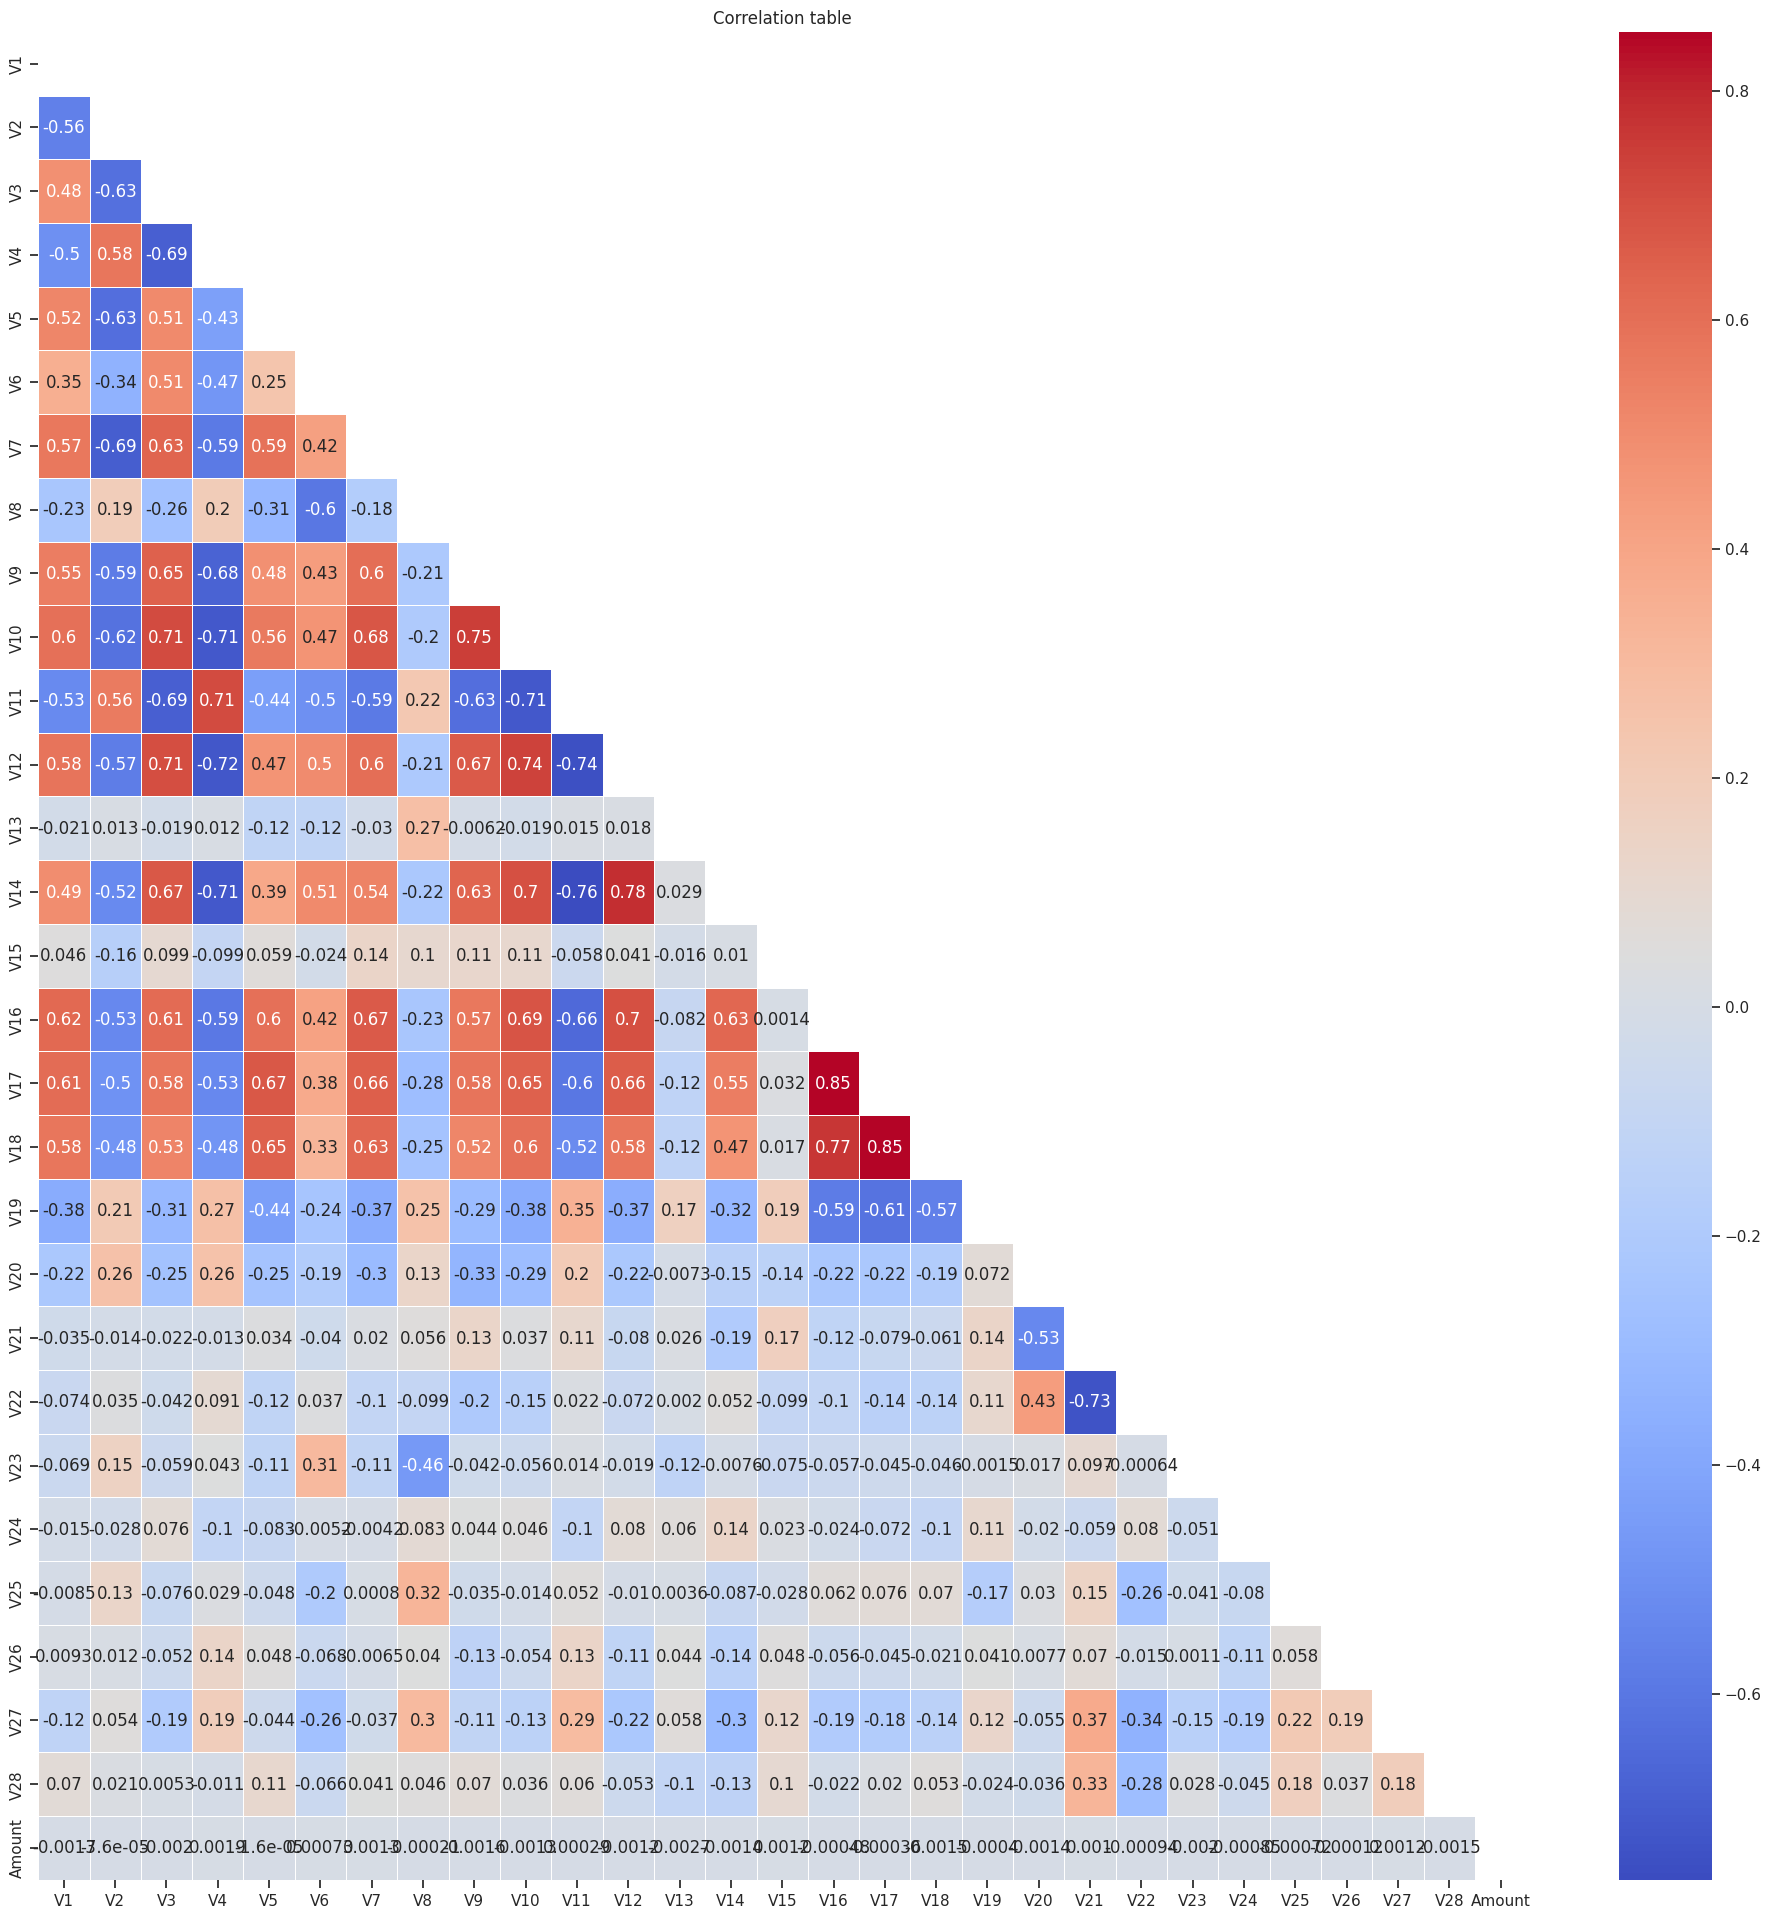

In [ ]:
plt.figure(figsize = (24, 24))

mask = np.triu(np.ones_like(correlation, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(data = correlation, cmap = "coolwarm", mask = mask,
            linewidths = 0.5, annot = True)

plt.title("Correlation table")

plt.show()

We can see that many features are strongly correlated with each other, but we'll look only on those, which have correlation 0.7 and higher:
- `V10` with `V3`, `V4` and `V9`
- `V11` with `V4` and `V10`
- `V12` with `V3`, `V4`, `V10` and `V11`
- `V14` with `V4`, `V10`, `V11` and `V12`
- `V16` with `V12`
- `V17` with `V16`
- `V18` with `V16` and `V17`
- `V22` with `V21`

Features `V3`, `V4`, `V10`, `V11`, `V12`, `V17`, `V18` and `V21` can be removed to reduce multicollinearity.

### Feature Distributions

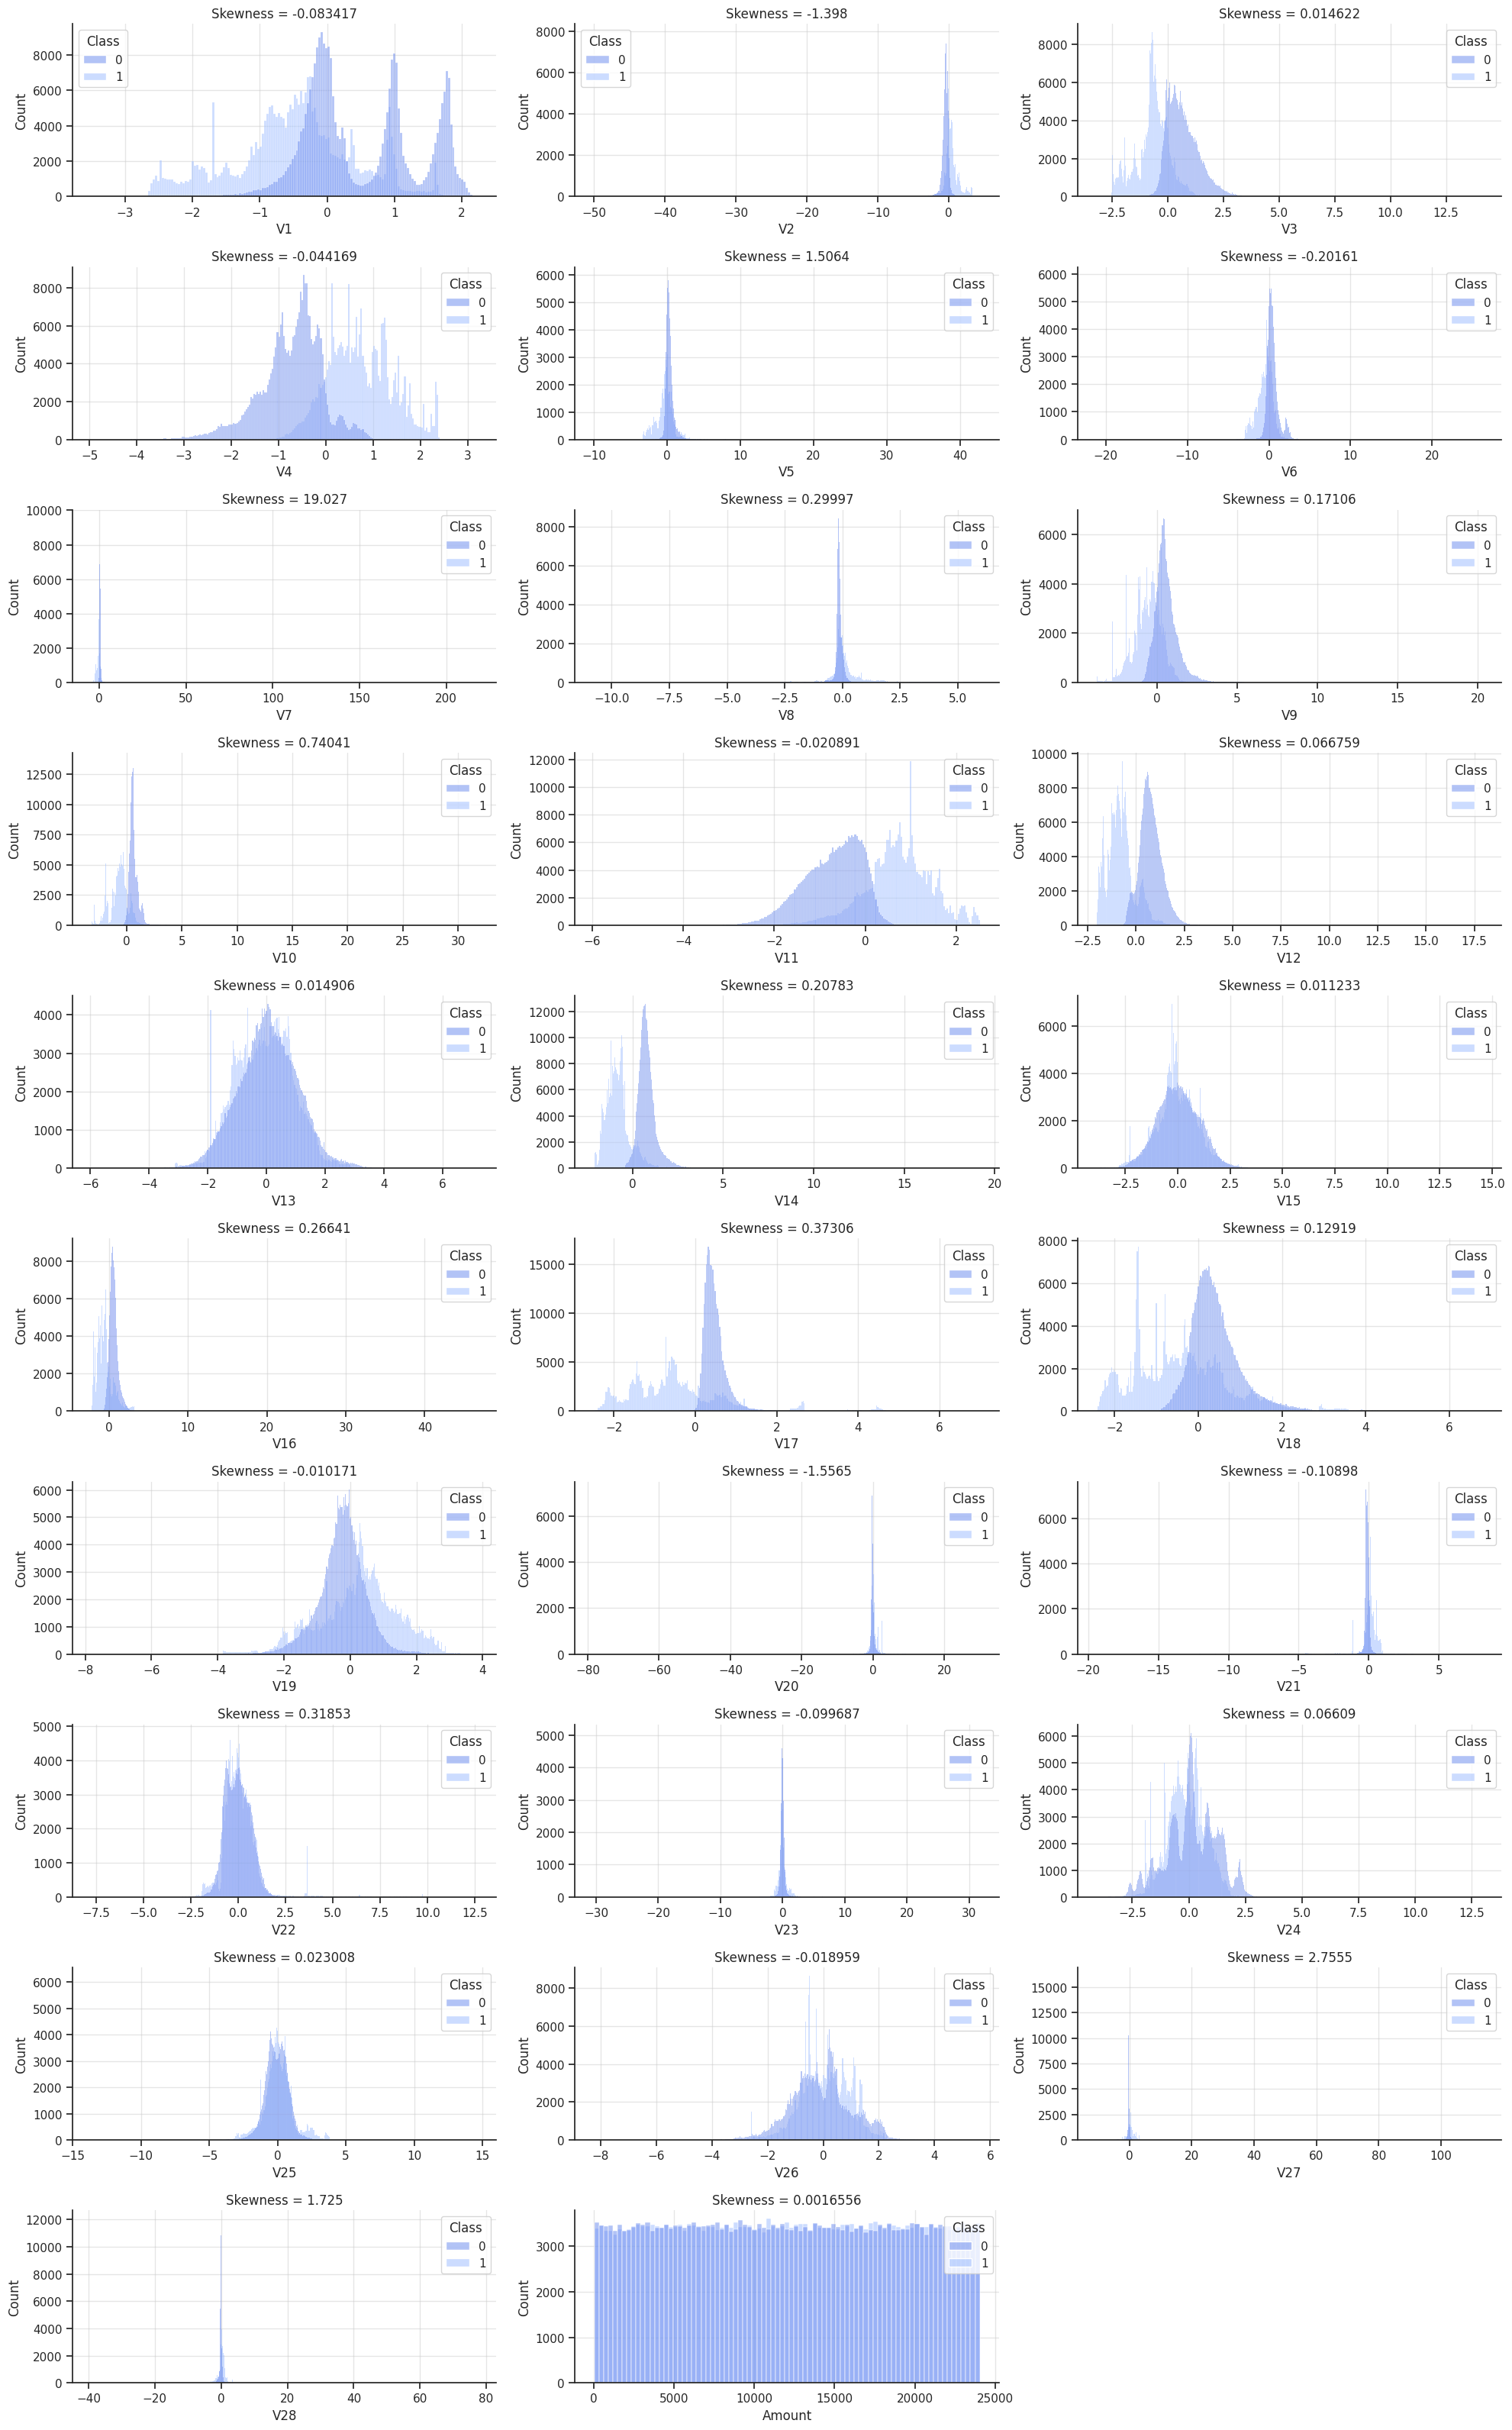

In [ ]:
figure = plt.figure(figsize = (20, 32))
rows, cols = 10, 3

for id, feature in enumerate(df.columns[:-1]):
    ax = figure.add_subplot(rows, cols, id + 1)
    ax.grid(alpha = 0.5, axis = "both")
    ax.set_title(f"Skewness = {df[feature].skew(axis = 0, skipna = False):.{5}}")

    sns.histplot(data = df, x = feature, hue = "Class")

    ax.set_xlabel(feature)

figure.tight_layout()
figure.show()

Some features like `V17` and `V18` have drastically different data distributions. It is important to take this into account, since this can affect performance of some algorithms.

Also, a lot of features are very skewed, especially `V7`.
We can see, that it is skewed the most.

In [ ]:
skewness = [df[feature].skew(axis = 0, skipna = False) for feature in df.columns[:-1]]
skewness = list(zip(skewness, df.columns[:-1]))

for value in sorted(skewness, reverse = True):
    print(value)

(19.026866097533325, 'V7')
(2.7554523064841256, 'V27')
(1.7249777746796184, 'V28')
(1.5064136757634041, 'V5')
(0.7404135529207346, 'V10')
(0.37306096758486784, 'V17')
(0.3185294709245726, 'V22')
(0.2999722258586845, 'V8')
(0.26640700878187756, 'V16')
(0.2078348004501865, 'V14')
(0.17105746155506976, 'V9')
(0.12919105951072873, 'V18')
(0.06675895200237957, 'V12')
(0.06608973847371898, 'V24')
(0.023008036822676475, 'V25')
(0.014906385371884177, 'V13')
(0.014622213363246254, 'V3')
(0.0112329832827567, 'V15')
(0.0016555849611610634, 'Amount')
(-0.010171229833627931, 'V19')
(-0.018958738922398494, 'V26')
(-0.02089056131978458, 'V11')
(-0.04416892714770696, 'V4')
(-0.08341717301015879, 'V1')
(-0.0996874579406956, 'V23')
(-0.10898326124277506, 'V21')
(-0.2016110101307477, 'V6')
(-1.397951923713946, 'V2')
(-1.5564597600792378, 'V20')


We will try to fix this with Power Transform during preprocessing.

### Outliers

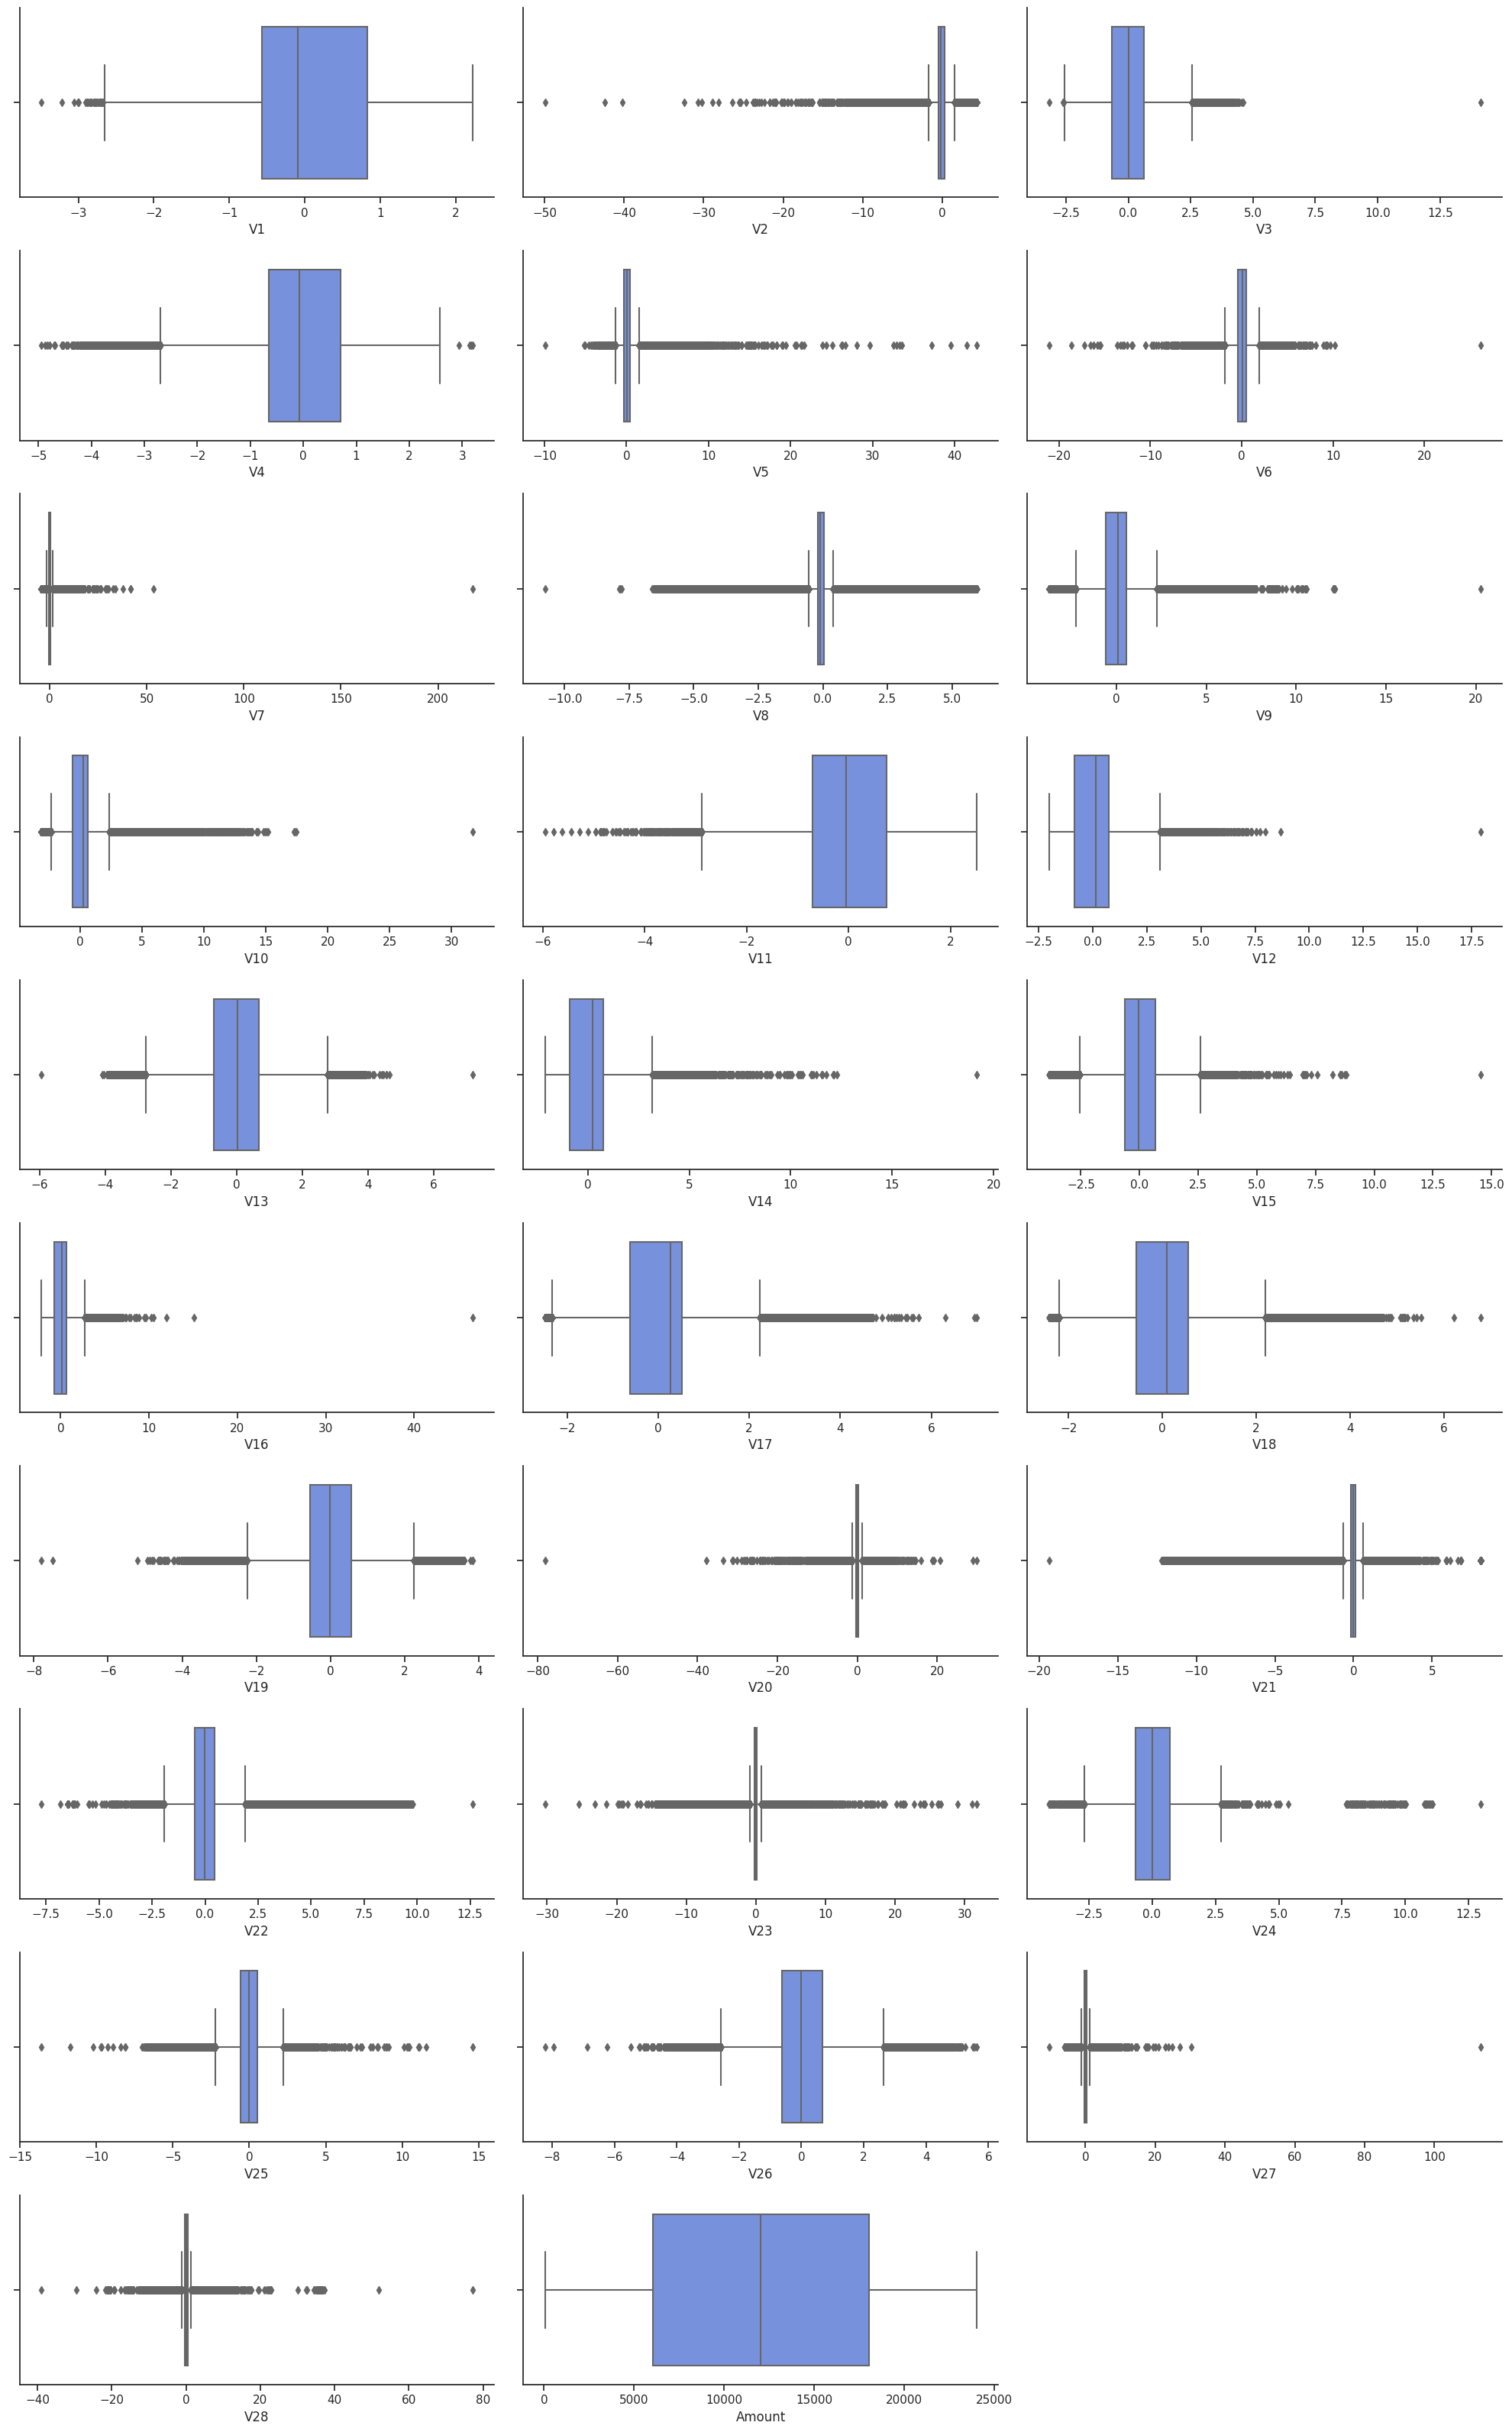

In [ ]:
figure = plt.figure(figsize = (20, 32))
rows, cols = 10, 3

for id, feature in enumerate(df.columns[:-1]):
    ax = figure.add_subplot(rows, cols, id + 1)

    sns.boxplot(data = df, x = feature)

    ax.set_xlabel(feature)

figure.tight_layout()
figure.show()

Looks like almost every feature has a lot of outliers.

On this point it's hard to tell, whether it's a good idea to remove them, so, for now, lets proceed further without touching them.

## Data Preparation

Lets write a function for data preparation and create a pipeline for data preprocessing to apply before modeling.

### Cleaning Data and Removing Multicollinearity

In [ ]:
def data_preparation(dataset, columns_to_drop):

    dataset = dataset.copy().drop(columns = columns_to_drop)

    dataset = dataset.drop_duplicates()

    return dataset

In [ ]:
columns_to_drop = ["V3", "V4", "V10", "V11", "V12", "V17", "V18", "V21"]
ws = data_preparation(df, columns_to_drop)

Double checking the distribution of values in the target feature.

In [ ]:
num_fraudulent_transactions = ws["Class"].loc[ws["Class"] == 1].count()
num_legit_transactions = ws["Class"].loc[ws["Class"] == 0].count()

print(f"""Number of fraudulent transactions: {num_fraudulent_transactions} \n
Number of legit transactions: {num_legit_transactions}""")

Number of fraudulent transactions: 284314 

Number of legit transactions: 284315


Distribution is still perfectly even, so we can safely use simple (not stratified) K-Folds for cross-validation.

### Preprocessing Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

preprocessing = Pipeline([
    ("normalize", PowerTransformer(standardize = True)),
])

## Creating Models

### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

X = ws.iloc[:, :-1]
y = ws.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 41)

### Instantiating Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)

All models will be used in their "out-of-the-box" versions - without any parameters adjustments.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([
    ("preprocessing", preprocessing),
    ("lr_model", LogisticRegression())
])

In [ ]:
from sklearn.svm import LinearSVC

svc_model = Pipeline([
    ("preprocessing", preprocessing),
    ("svc_model", LinearSVC())
])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = Pipeline([
    ("preprocessing", preprocessing),
    ("rfc_model", RandomForestClassifier())
])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = Pipeline([
    ("preprocessing", preprocessing),
    ("gbc_model", GradientBoostingClassifier())
])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc_model = Pipeline([
    ("preprocessing", preprocessing),
    ("abc_model", AdaBoostClassifier())
])

## Evaluating Models

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 41)

metrics = ["accuracy", "f1", "roc_auc"]

lr_scores = cross_validate(lr_model, X_train, y_train, cv = kfold,
                           scoring = metrics,
                           return_train_score = True)

svc_scores = cross_validate(svc_model, X_train, y_train, cv = kfold,
                           scoring = metrics,
                           return_train_score = True)

rfc_scores = cross_validate(rfc_model, X_train, y_train, cv = kfold,
                           scoring = metrics,
                           return_train_score = True)

gbc_scores = cross_validate(gbc_model, X_train, y_train, cv = kfold,
                           scoring = metrics,
                           return_train_score = True)

abc_scores = cross_validate(abc_model, X_train, y_train, cv = kfold,
                           scoring = metrics,
                           return_train_score = True)

In [ ]:
models = {"lr_model" : lr_scores, "svc_model" : svc_scores, "rfc_model" : rfc_scores,
          "gbc_model" : gbc_scores, "abc_model" : abc_scores}


def prepare_scores(models, metrics):

  t_scores = dict(zip(models.keys(), [list() for i in range(len(models))]))
  v_scores = dict(zip(models.keys(), [list() for i in range(len(models))]))
  train_time = dict(zip(models.keys(), [list() for i in range(len(models))]))

  for name, model in models.items():
      train_scores = [np.array(model["train_" + metric]).mean() for metric in metrics]
      train_scores = dict(zip(metrics, train_scores))
      t_scores[name] = train_scores

      validation_scores = [np.array(model["test_" + metric]).mean() for metric in metrics]
      validation_scores = dict(zip(metrics, validation_scores))
      v_scores[name] = validation_scores

      time = np.array(model["fit_time"]).mean()
      train_time[name] = time

  return t_scores, v_scores, train_time

t_scores, v_scores, train_time = prepare_scores(models, metrics)

## Comparing Models

In [ ]:
models = ["LogisticRegression", "LinearSVC", "RandomForestClassifier",
          "GradientBoostingClassifier", "AdaBoostClassifier"]
data = ["Train", "Validation"]

index = pd.MultiIndex.from_product([models, data], names = ["model", "data"])

metrics_comparison = pd.DataFrame(data = [t_scores["lr_model"], v_scores["lr_model"],
                               t_scores["svc_model"], v_scores["svc_model"],
                                t_scores["rfc_model"], v_scores["rfc_model"],
                                t_scores["gbc_model"], v_scores["gbc_model"],
                                t_scores["abc_model"], v_scores["abc_model"]],
                                index = index)
display(metrics_comparison)

accuracy        f1   roc_auc
model                      data                                    
LogisticRegression         Train       0.943127  0.941261  0.975101
                           Validation  0.943111  0.941247  0.975086
LinearSVC                  Train       0.943298  0.941102  0.974903
                           Validation  0.943320  0.941127  0.974890
RandomForestClassifier     Train       1.000000  1.000000  1.000000
                           Validation  0.999848  0.999848  0.999994
GradientBoostingClassifier Train       0.969577  0.969008  0.997213
                           Validation  0.969050  0.968465  0.997096
AdaBoostClassifier         Train       0.951153  0.950019  0.991877
                           Validation  0.950581  0.949425  0.991633

We can see that RandomForestClassifier shows the best results.

Now lets also check model's training time.

In [ ]:
models = ["LogisticRegression", "LinearSVC", "RandomForestClassifier",
          "GradientBoostingClassifier", "AdaBoostClassifier"]

fit_time = pd.DataFrame(data = [train_time["lr_model"]/60, train_time["svc_model"]/60,
                                train_time["rfc_model"]/60, train_time["gbc_model"]/60,
                                train_time["abc_model"]/60],
                        index = models,
                        columns = ["Fit Time (min)"]).sort_values(by = "Fit Time (min)")

display(fit_time)

,Fit Time (min)
LogisticRegression,0.178698
AdaBoostClassifier,1.547725
LinearSVC,1.648957
RandomForestClassifier,4.513442
GradientBoostingClassifier,7.189566


Although Random Forest Classifier does the best on given data, it is pretty slow - the second slowest algorithm.

At the meantime, AdaBoost Classifier is second fastest, but on 5% less accurate.

It should be considered in the process of product creation - if we value speed over accuracy - AdaBoost Classifier is a better choice, even out of the box.

But, since "speed over accuracy" is not the case in credit card fraud detection, we will accept Random Forest Classifier as the best choice and proceed further with it.

## Fine-tuning

Lets retrain Random Forest Classifier on all features and see which ones it sees as the most important.

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 41)

In [ ]:
rfc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('normalize', PowerTransformer())])),
                ('rfc_model', RandomForestClassifier())])

In [ ]:
sorted(list(zip(rfc_model[1].feature_importances_,rfc_model.feature_names_in_)),
       reverse = True)

[(0.24833477811379262, 'V14'),
 (0.12662725996832788, 'V10'),
 (0.1172628993098593, 'V12'),
 (0.097589242325802, 'V4'),
 (0.06977746067008042, 'V11'),
 (0.06791896355719848, 'V17'),
 (0.047550781472300026, 'V3'),
 (0.03808694412220551, 'V16'),
 (0.030507188316093014, 'V7'),
 (0.016407938115599364, 'V2'),
 (0.013216368922536652, 'V21'),
 (0.01206234471908539, 'V9'),
 (0.012003114027266821, 'V6'),
 (0.011026672662316857, 'V8'),
 (0.01054024700564158, 'V1'),
 (0.010004855925440337, 'V18'),
 (0.007489981682445037, 'V5'),
 (0.007319566484701014, 'V19'),
 (0.007030446764772416, 'V20'),
 (0.00690396963346818, 'V28'),
 (0.006441971627595157, 'V13'),
 (0.00569213394124802, 'V15'),
 (0.005529244776568529, 'V25'),
 (0.005376911718468439, 'V26'),
 (0.005362471822877206, 'V27'),
 (0.005115443903064772, 'V23'),
 (0.0044193221842159505, 'V22'),
 (0.004345893209936347, 'V24'),
 (5.5583017092658e-05, 'Amount')]

Features are rated as:
- `V14`, `V10`, `V12`, `V4` - the most important.
- `V17`, `V11`, `V16`, `V3`, `V7` - less important.
- `V9`, `V2`, `V21`, `V6`, `V8`, `V27` - the least important.
- and all other features are almost insignificant at all.


Now we can perform another round of feature selection.

In [ ]:
columns_to_drop = ["V1", "V18", "V5", "V19", "V13", "V20", "V28",
                   "V26", "V15", "V23", "V25", "V24", "V22", "Amount"]
ws = data_preparation(df, columns_to_drop)

In [ ]:
X = ws.iloc[:, :-1]
y = ws.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 41)

In [ ]:
rfc_scores = cross_validate(rfc_model, X_train, y_train, cv = kfold,
                            scoring = metrics,
                            return_train_score = True)

rfc_t_score, rfc_v_score, rfc_train_time = prepare_scores({"rfc_model" : rfc_scores}, metrics)

In [ ]:
models = ["RandomForestClassifier"]
data = ["Train", "Validation"]

index = pd.MultiIndex.from_product([models, data], names = ["model", "data"])

metrics_comparison = pd.DataFrame(data = [rfc_t_score["rfc_model"],
                               rfc_v_score["rfc_model"]],
                               index = index)
display(metrics_comparison)

accuracy        f1   roc_auc
model                  data                                    
RandomForestClassifier Train       0.999999  0.999999  1.000000
                       Validation  0.999801  0.999801  0.999981

Results are still impressive, considering that almost half of features was dropped.

## Analyzing Model's Performance

We can finally retrain our model on all available data and measure it's generalization error.

In [ ]:
rfc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('normalize', PowerTransformer())])),
                ('rfc_model', RandomForestClassifier())])

In [ ]:
def eval_test(model, X_test, y_test):
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

    metrics = ["accuracy", "f1", "roc_auc"]

    test_predictions = model.predict(X_test)

    test_scores = list((accuracy_score(y_test, test_predictions),
                        f1_score(y_test, test_predictions),
                        roc_auc_score(y_test, test_predictions)))

    test_scores = dict(zip(metrics, test_scores))

    return test_scores, test_predictions

In [ ]:
rfc_test_score, rfc_test_predictions = eval_test(rfc_model, X_test, y_test)

In [ ]:
models = ["RandomForestClassifier"]
data = ["Test"]

index = pd.MultiIndex.from_product([models, data], names = ["model", "data"])

metrics_comparison = pd.DataFrame(data = [rfc_test_score] , index = index)
display(metrics_comparison)

,,accuracy,f1,roc_auc
model,data,,,
RandomForestClassifier,Test,0.999855,0.999855,0.999855


99% accuracy and both F1 and ROC AUC Scores of almost 1.
Metrics are even slightly higher than on the Validation Sets.

Looks like the case for publishing a paper.

## Analyzing Errors

Lets check out if the outliers affected model's performance much.

Detecting misclassified data entries.

In [ ]:
mis_class_ids = y_test.loc[y_test != rfc_test_predictions].index

mf = X_test.loc[mis_class_ids]

In [ ]:
num_misclassified = mf.shape[0]
print(f"Number of misclassified data entries: {num_misclassified}")

Number of misclassified data entries: 8


Detecting outliers by using IQR.

In [ ]:
def get_outliers_ids(dataset):

    num_type_features = dataset.loc[:, dataset.dtypes != object].columns

    outliers_ids = dict(zip(num_type_features,
                        [list() for i in range(len(num_type_features))]))

    for feature in num_type_features:

        q1 = np.percentile(dataset[feature], 25)
        q3 = np.percentile(dataset[feature], 75)
        iqr_range = (q3 - q1) * 1.5

        lower_bound = q1 - iqr_range
        upper_bound = q3 + iqr_range

        outliers = dataset.loc[(dataset[feature] < lower_bound) |
                               (dataset[feature] > upper_bound)].index

        outliers_ids[feature].extend(outliers)

    combined_outliers_ids = set()

    for key in outliers_ids:
        combined_outliers_ids.update(outliers_ids[key])

    return outliers_ids, combined_outliers_ids

In [ ]:
outliers_ids, combined_outliers_ids = get_outliers_ids(ws)

In [ ]:
num_outliers = len(combined_outliers_ids)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 171808


Reviewing how many of misclassified data entries were among outliers.

In [ ]:
num_outliers_in_mis_class = mf.loc[mf.index.isin(combined_outliers_ids)].shape[0]
print(f"Number of outliers in misclassified data entries: {num_outliers_in_mis_class}")

Number of outliers in misclassified data entries: 2


Only 2 of 9 misclassified data entries were outliers, so it's not much of a problem, that they were not removed.

# Conclusions

As we were managed to prove, it's definitely possible to build a good classifier on anonymized data.

But there are some major problems in working with that kind of data.

1. Anonymized features do not give a chance to detect whether data leakage took place and prevent it.
2. Anonymized features do not give a chance to perform meaningful error analysis.
3. With anonymized data (especially preprocessed by PCA algorithm) it is impossible to know how hard or easy it is to obtain the features on which model is built on. For example, the model is build on a handful of most promising features. Than one day this features are considered too expensive to extract, or considered the source of data leakage, and therefore they are withdrawn. In that case all process of creating a model must be started over, that might not have been the case if features were known beforehand.